In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from subfunc import plot_feature_importance, show_result
from subfunc import multi_model_load, multi_model_save
from tqdm import tqdm

In [2]:
DATA_PATH = 'data/'

X_train = pd.read_csv(f'{DATA_PATH}x_train.csv',sep='\t', index_col='index')
X_test = pd.read_csv(f'{DATA_PATH}x_test.csv', sep='\t', index_col='index')
y_train = pd.read_csv(f'{DATA_PATH}y_train.csv',sep='\t', index_col='index')
y_test = pd.read_csv(f'{DATA_PATH}y_test.csv', sep='\t', index_col='index')

In [3]:
target_list = ['химшлак последний Al2O3',
               'химшлак последний CaO',
               'химшлак последний R',
               'химшлак последний SiO2']


In [4]:
is_fitted = False

In [5]:
best_model = None
np.random.seed(42)
best_score = 0

if not is_fitted:
    for n_estimators in tqdm(range(300, 600, 50)):
        for lr in tqdm(range(1, 200, 10)):
            mult_model  = MultiOutputRegressor(GradientBoostingRegressor
                (
                    n_estimators=n_estimators,
                    learning_rate=lr/1000),
                n_jobs=2)

            mult_model.fit(X_train, y_train)
            cur_score = r2_score(y_test, mult_model.predict(X_test))

            if cur_score > best_score:
                best_score = cur_score
                best_model = mult_model
                print(best_score)

    multi_model_save(best_model)

else:
    best_model = multi_model_load()
    best_score = r2_score(y_test, best_model.predict(X_test))

100%|██████████| 6/6 [32:14<00:00, 322.35s/it]


0.2877934015052297
0.6685008395513845
0.6711855421106749
0.67124687119297
0.671455765200822
0.6716436254116513


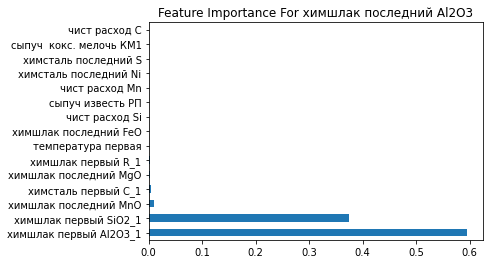

In [6]:
plot_feature_importance(best_model, X_train, 0, 'Feature Importance For химшлак последний Al2O3')

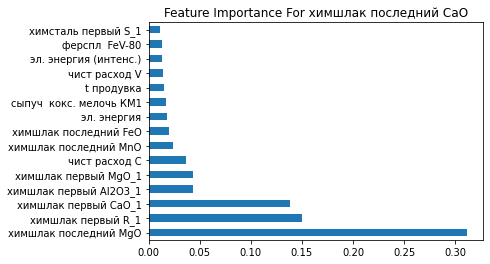

In [7]:
plot_feature_importance(best_model, X_train, 1, 'Feature Importance For химшлак последний CaO')

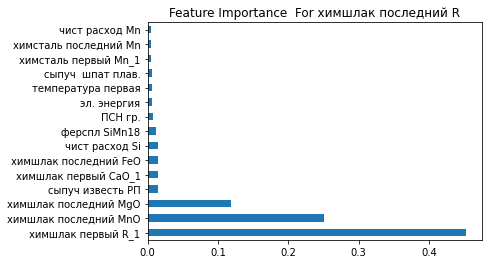

In [8]:
plot_feature_importance(best_model, X_train, 2, 'Feature Importance  For химшлак последний R')

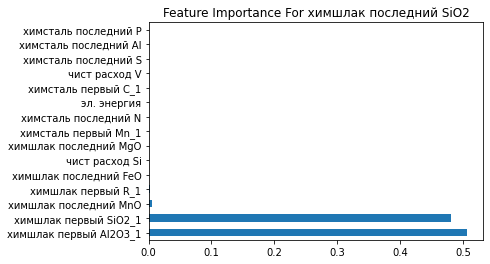

In [9]:
plot_feature_importance(best_model, X_train, 3, 'Feature Importance For химшлак последний SiO2')

In [10]:
best_score

0.6716436254116513

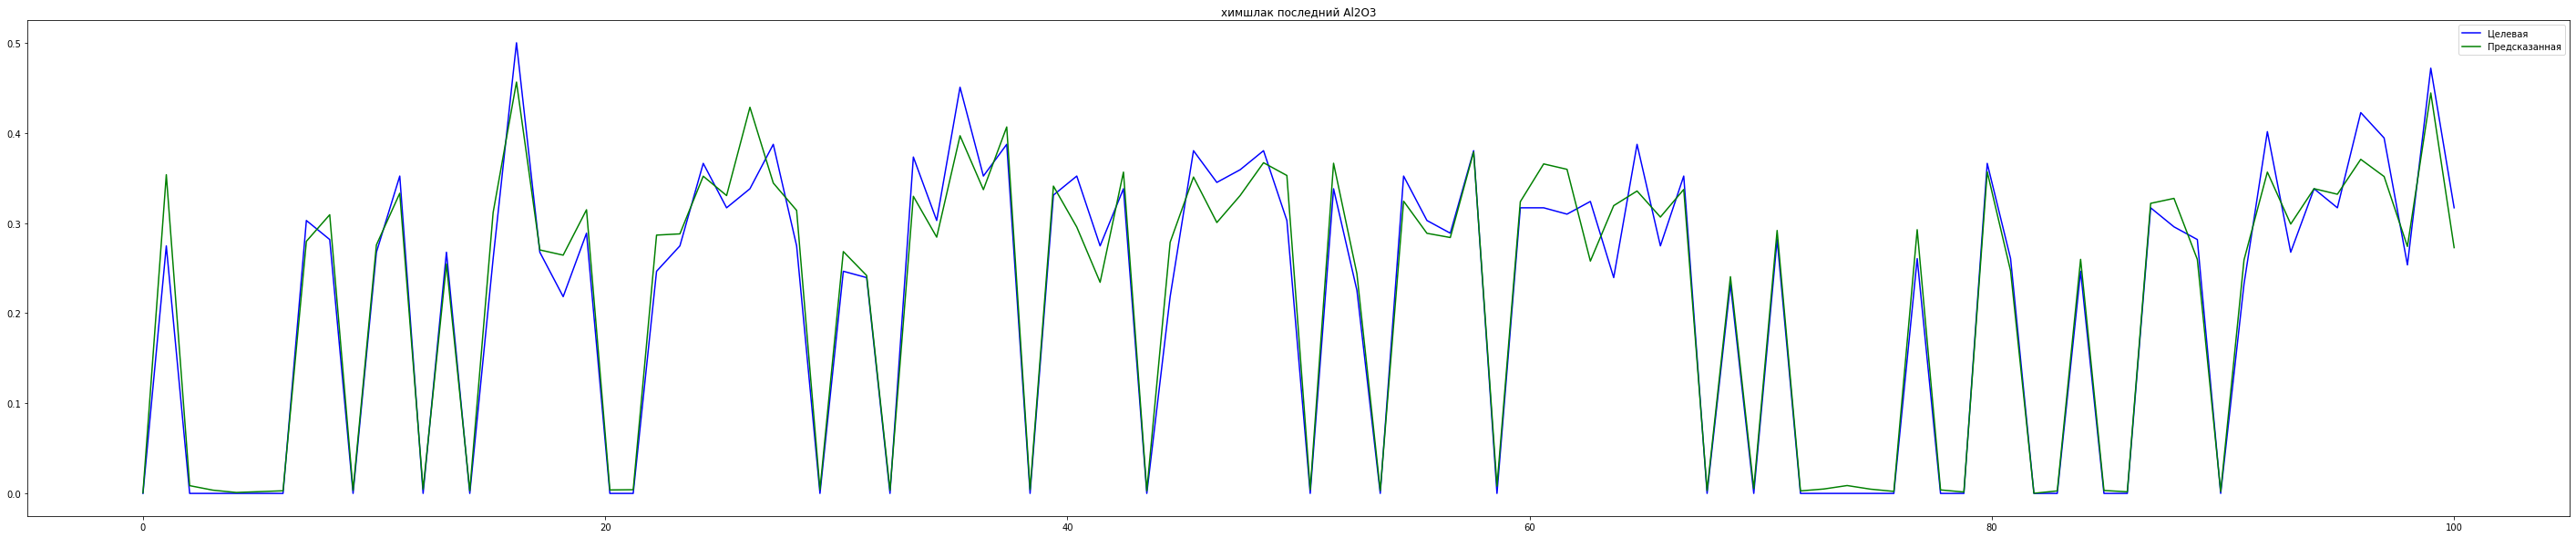

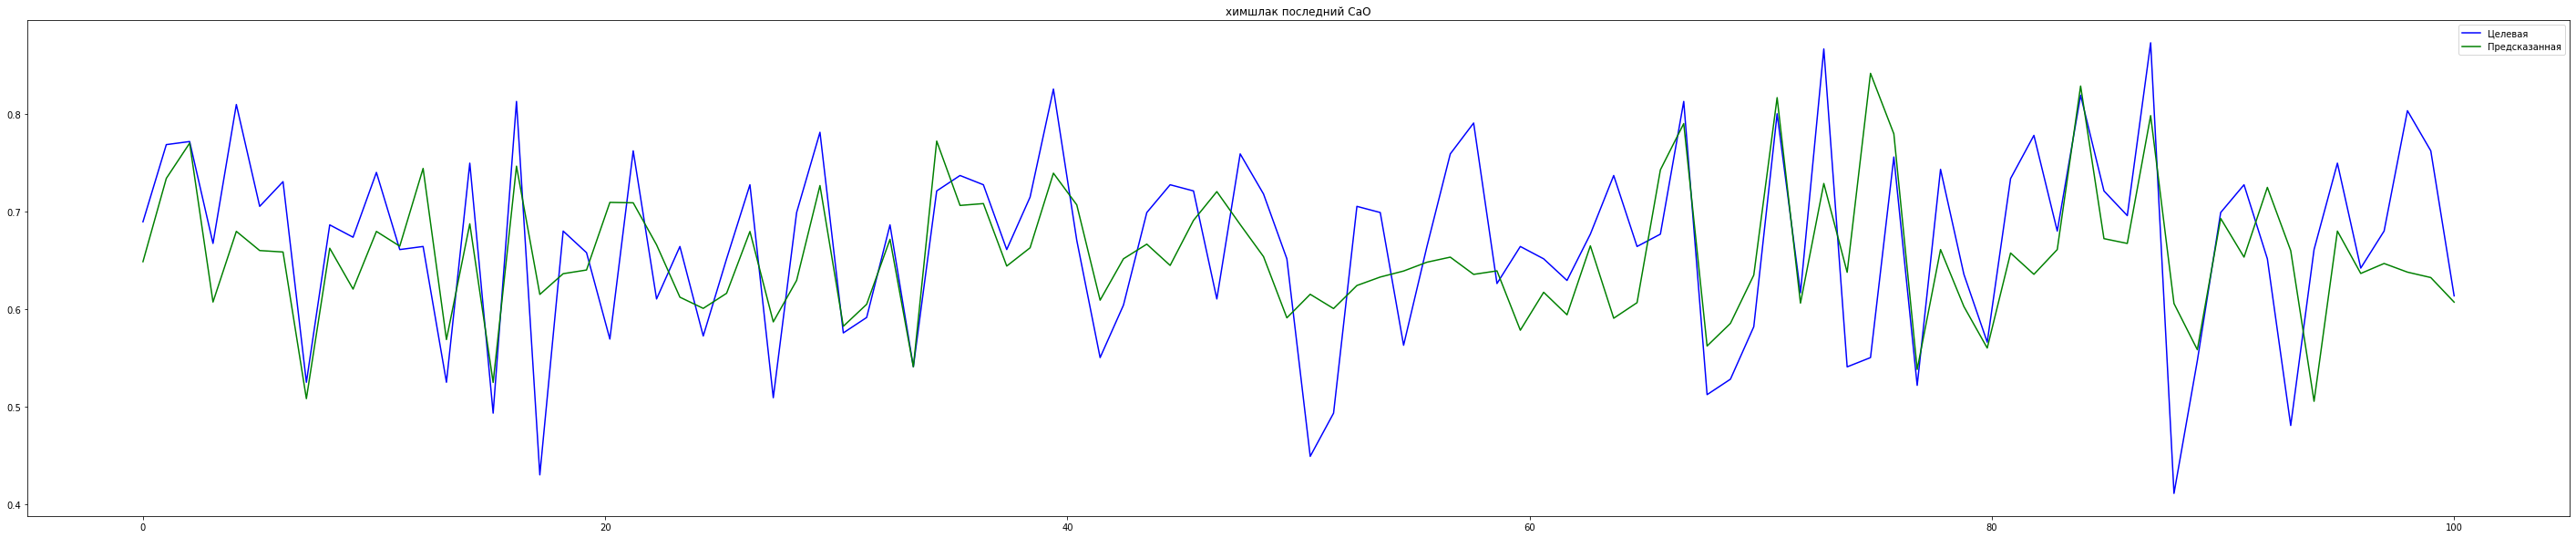

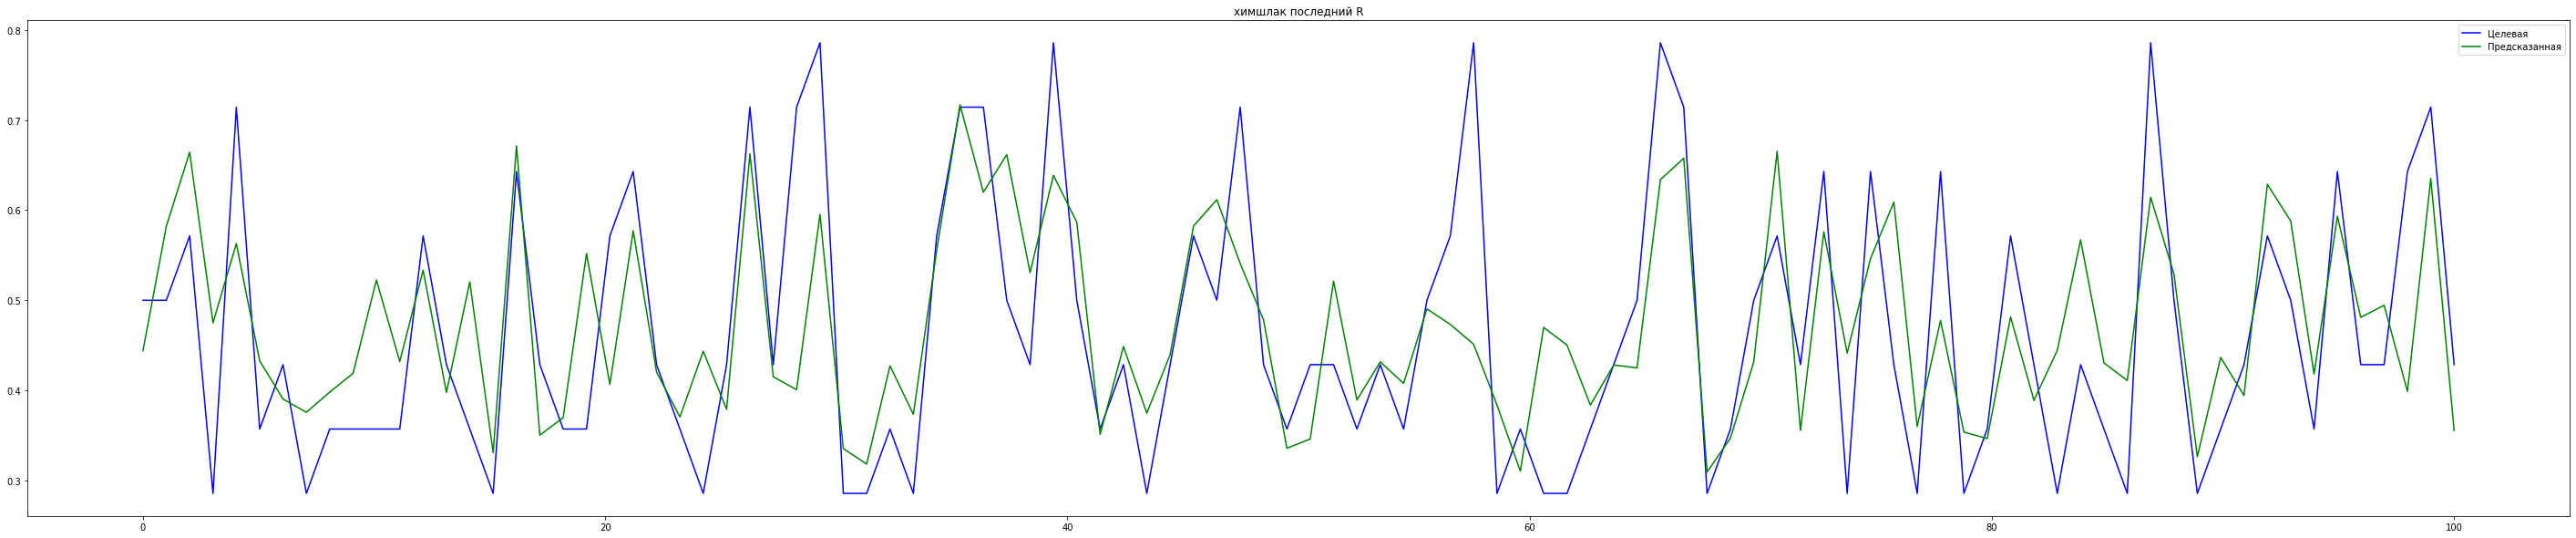

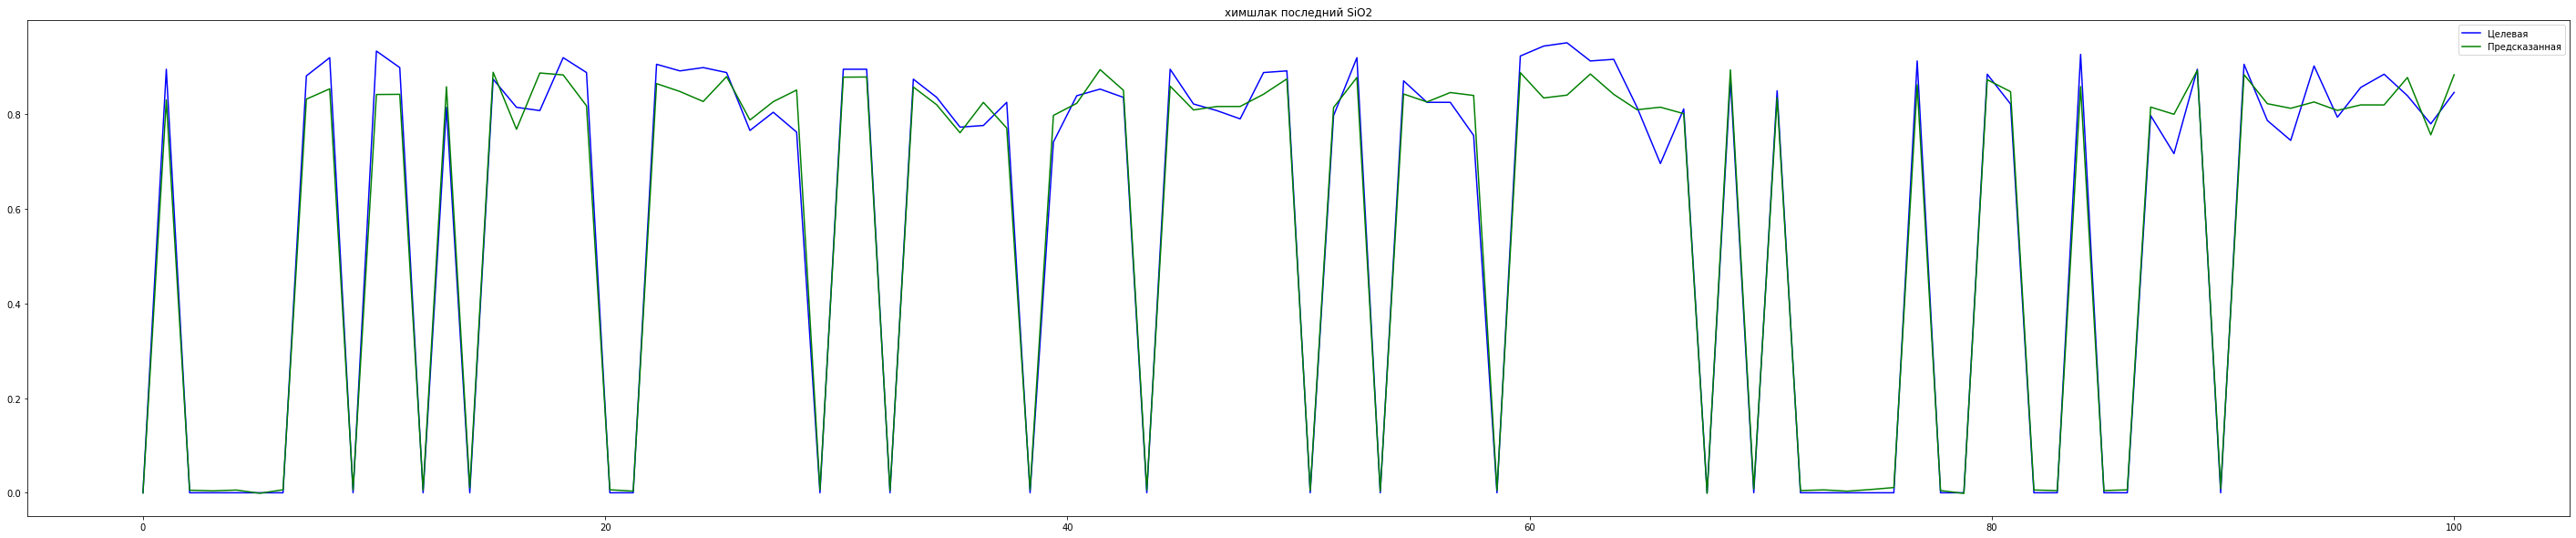

In [22]:
predict = best_model.predict(X_test)
show_result(predict, y_test, 'source/result' )

In [15]:
mean_absolute_error(y_pred=predict, y_true=y_test)



0.05540899687745911